# Compulsory Assignment 3 Teststrecke

Leonard Brenk, Finn Federsan, Felix Wltschek

## Question 1

In [11]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [2]:
# Load datasets
true_csv = pd.read_csv("True.csv")
fake_csv = pd.read_csv("Fake.csv")
fake_csv['label'] = 0
true_csv['label'] = 1
df = pd.concat([fake_csv, true_csv], ignore_index=True)

In [4]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### 1.1. Preprocess

In [5]:
# Preprocessing
df['text'] = df['title'] + ' ' + df['text']
df = df.drop(['title', 'subject', 'date'], axis=1)
df['text'] = df['text'].apply(lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))
df['text'] = df['text'].apply(lambda x: re.sub("\s+", " ", x))
df['text'] = df['text'].apply(lambda x: x.lower())

### 1.2 Stoppwords

In [6]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and len(word) > 2]))


### 1.3 Split

In [7]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


### 1.4 Tokenize

In [8]:
# Tokenizing and padding
max_len = 250
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
vocab_size = len(tokenizer.word_index) + 1

### 1.5 Model 

In [9]:
# Building model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



### 1.6 Training

In [10]:
# Training model
model.fit(X_train_padded, y_train, batch_size=64, epochs=2, validation_split=0.2)


2023-04-07 15:45:33.612104: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/2
449/449 [==============================] - 69s 149ms/step - loss: 0.0752 - accuracy: 0.9700 - val_loss: 0.0204 - val_accuracy: 0.9940
Epoch 2/2
449/449 [==============================] - 66s 146ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0156 - val_accuracy: 0.9953


### 1.7 Evaluate accuracy

In [11]:
# Evaluate the model on test data, print the accuracy, and return the loss and accuracy values

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("accuracy: " + str(accuracy))
print("loss: " + str(loss))


281/281 [==============================] - 12s 42ms/step - loss: 0.0198 - accuracy: 0.9949
accuracy: 0.9948775172233582
loss: 0.019771970808506012


## Question 2

In [5]:
%matplotlib inline


In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [46]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [47]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [48]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [49]:
# Normalize pixel values to be between 0 and 1 (ONE OR THE OTHER)
x_train = x_train  / 255.0
x_test = x_test / 255.0

TypeError: list indices must be integers or slices, not numpy.float32

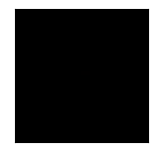

In [50]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [51]:
keras.backend.clear_session()


model = keras.models.Sequential([
    Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (5, 5), padding="same", activation='relu'),
    BatchNormalization(),
    Conv2D(64, (5, 5), padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), padding="same", activation='relu'),
    Conv2D(64, (5, 5), padding="same", activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding="same", activation='relu'),
    Conv2D(128, (5, 5), padding="same", activation='relu'),
    Conv2D(128, (5, 5), padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [52]:
# view training and validation accuracy for each training epoch, pass the `metrics` argument.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
# [TODO] View all the layers of the network using the model's `summary` method:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        1

In [54]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 426s 271ms/step - loss: 0.2620 - accuracy: 0.3735 - val_loss: 0.4470 - val_accuracy: 0.1532
Epoch 2/10
1563/1563 [==============================] - 420s 269ms/step - loss: 0.1993 - accuracy: 0.5640 - val_loss: 0.3702 - val_accuracy: 0.3403
Epoch 3/10
1563/1563 [==============================] - 423s 271ms/step - loss: 0.1654 - accuracy: 0.6484 - val_loss: 0.3159 - val_accuracy: 0.3138
Epoch 4/10
1563/1563 [==============================] - 423s 271ms/step - loss: 0.1482 - accuracy: 0.6920 - val_loss: 0.1719 - val_accuracy: 0.6449
Epoch 5/10
1563/1563 [==============================] - 425s 272ms/step - loss: 0.1347 - accuracy: 0.7214 - val_loss: 0.2686 - val_accuracy: 0.5044
Epoch 6/10
1563/1563 [==============================] - 423s 271ms/step - loss: 0.1245 - accuracy: 0.7474 - val_loss: 0.2349 - val_accuracy: 0.4921
Epoch 7/10
1563/1563 [==============================] - 430s 275ms/step - loss: 0.1152 - accuracy: 0.7661 - val_

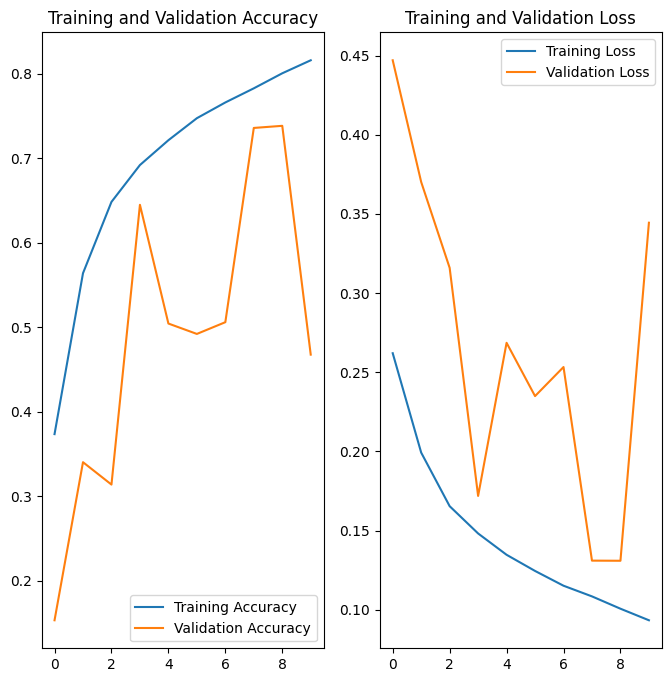

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

# Plot the figure for Training and Validation Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the figure for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()